In [1]:
import pandas as pd

In [167]:
sdd = pd.read_csv('/Users/adithya/Downloads/machine_learning/ML_LAB/regression2.csv')

In [168]:
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sdd.head()

,tempm,month,pressurem,year,day
0,9,1,1021,1997,1
1,9,1,1016,1997,2
2,11,1,1016,1997,3
3,11,1,1016,1997,4
4,14,1,1018,1997,5


In [169]:
import matplotlib.pyplot as plt

In [170]:
import seaborn as sns

In [171]:
sns.set(style='whitegrid', context='notebook')

In [172]:
cols = ['tempm', 'pressurem', 'month', 'day','year']

In [173]:
sns.pairplot(sdd[cols], size=2.5);

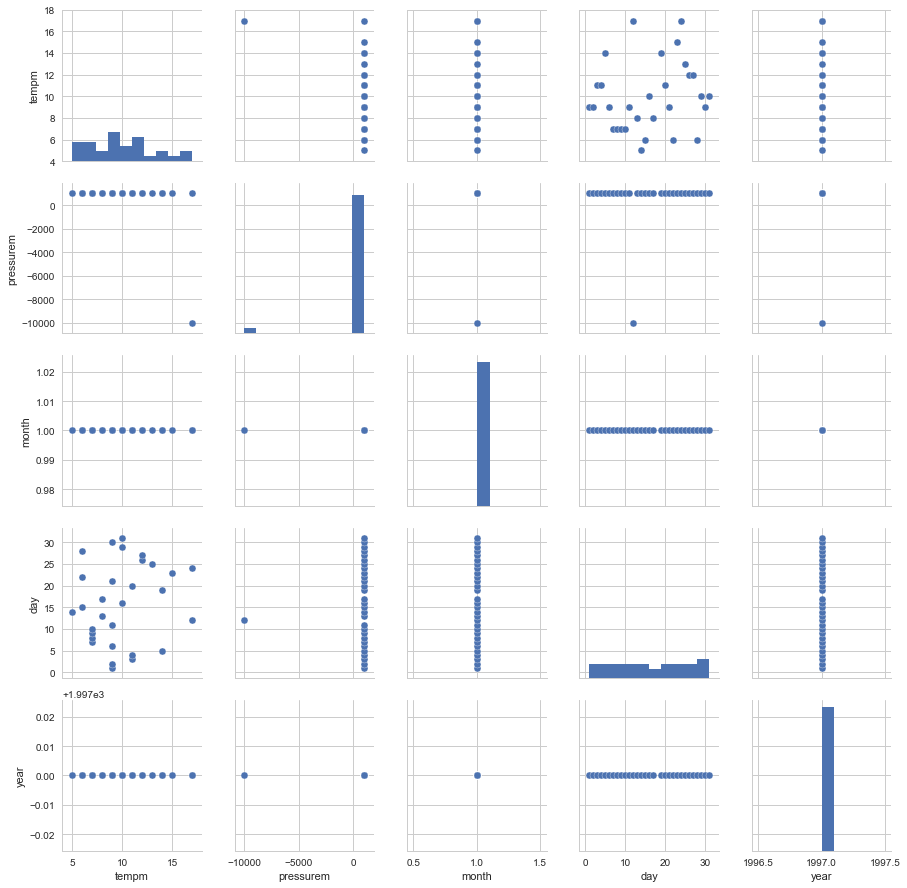

In [174]:
plt.show()

In [175]:
import numpy as np

In [176]:
cm = np.corrcoef(sdd[cols].values.T)

/Users/adithya/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adithya/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [177]:
sns.set(font_scale=1.5)

In [181]:
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)

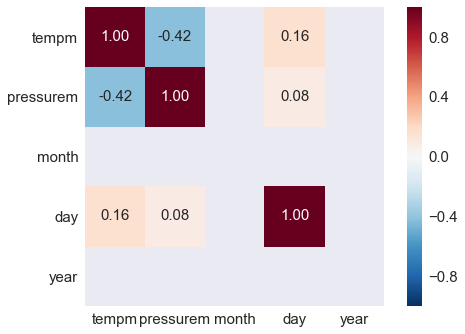

In [182]:
plt.show()

In [183]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=200):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
           return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
           return self.net_input(X)

In [184]:
X = sdd[['day']].values

In [185]:
y = sdd['tempm'].values

In [186]:
y

array([ 9,  9, 11, 11, 14,  9,  7,  7,  7,  7,  9, 17,  8,  5,  6, 10,  8,
       14, 11,  9,  6, 15, 17, 13, 12, 12,  6, 10,  9, 10])

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
sc_x = StandardScaler()

In [189]:
sc_x

StandardScaler(copy=True, with_mean=True, with_std=True)

In [190]:
sc_y = StandardScaler()

In [191]:
X_std = sc_x.fit_transform(X)

/Users/adithya/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [192]:
X_std

array([[-1.64381811],
       [-1.533741  ],
       [-1.4236639 ],
       [-1.31358679],
       [-1.20350969],
       [-1.09343258],
       [-0.98335548],
       [-0.87327837],
       [-0.76320126],
       [-0.65312416],
       [-0.54304705],
       [-0.43296995],
       [-0.32289284],
       [-0.21281574],
       [-0.10273863],
       [ 0.00733847],
       [ 0.11741558],
       [ 0.33756979],
       [ 0.4476469 ],
       [ 0.557724  ],
       [ 0.66780111],
       [ 0.77787821],
       [ 0.88795532],
       [ 0.99803242],
       [ 1.10810953],
       [ 1.21818663],
       [ 1.32826374],
       [ 1.43834084],
       [ 1.54841795],
       [ 1.65849506]])

In [193]:
y_std = sc_y.fit_transform(y)

/Users/adithya/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/adithya/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/adithya/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [194]:
y_std

array([-0.29620095, -0.29620095,  0.33851537,  0.33851537,  1.29058987,
       -0.29620095, -0.93091728, -0.93091728, -0.93091728, -0.93091728,
       -0.29620095,  2.24266436, -0.61355912, -1.56563361, -1.24827544,
        0.02115721, -0.61355912,  1.29058987,  0.33851537, -0.29620095,
       -1.24827544,  1.60794803,  2.24266436,  0.9732317 ,  0.65587354,
        0.65587354, -1.24827544,  0.02115721, -0.29620095,  0.02115721])

In [195]:
lr = LinearRegressionGD()

In [196]:
lr.fit(X_std, y_std)

In [197]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)

In [198]:
plt.ylabel('SSE')

In [199]:
plt.xlabel('Epoch')

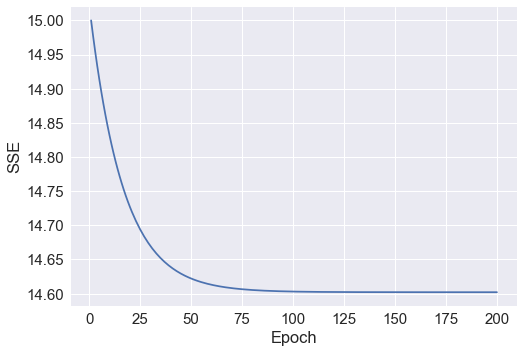

In [200]:
#sse = sum of squared errors
plt.show()

In [201]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

In [210]:
lin_regplot(X_std, y_std, lr)

In [211]:
plt.xlabel('date')

In [212]:
plt.ylabel('temperature')

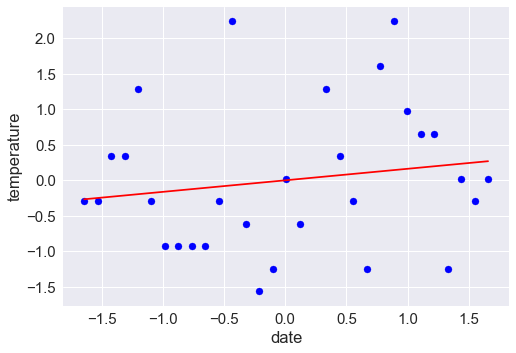

In [213]:
plt.show()